In [50]:
%matplotlib inline
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image
import time, math
%matplotlib inline
S = 4 #UPSCALING FACTOR

Text(0.5,1,'HR BICUBIC')

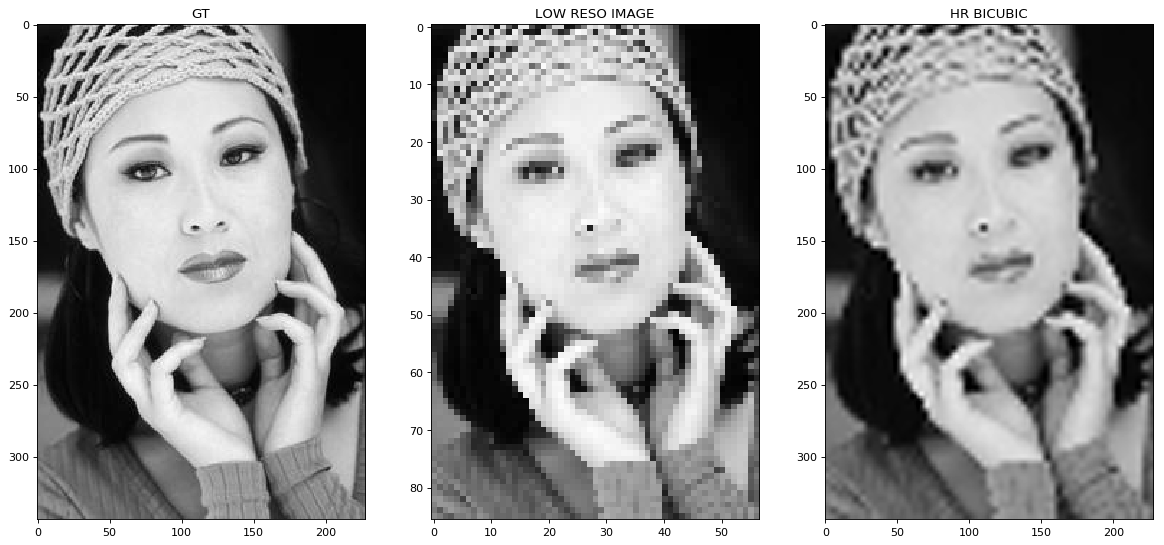

In [51]:
# READ THE GROUND TRUTH REFERENCE IMAGE
ref = cv2.imread("/home/wazir/SRCNN MODEL/SRCNN/Test/Set5/woman_GT.bmp", 0)
res = cv2.resize(ref,None,fx=1/S, fy=1/S, interpolation = cv2.INTER_CUBIC)
res1 = cv2.resize(res,None,fx=S, fy=S, interpolation = cv2.INTER_CUBIC)

fig = plt.figure(figsize = (18,16), dpi = 80)
ax = plt.subplot("131")
ax.imshow(ref, cmap='gray')
ax.set_title("GT")


ax = plt.subplot("132")
ax.imshow(res, cmap='gray')
ax.set_title("LOW RESO IMAGE")



ax = plt.subplot("133")
ax.imshow(res1, cmap = 'gray')
ax.set_title("HR BICUBIC")


In [52]:
# Here is the function for PSNR calculation
def PSNR(res1, ref, shave_border=0):
    height, width = res1.shape[:2]
    res1 = res1[shave_border:height - shave_border, shave_border:width - shave_border]
    ref = ref[shave_border:height - shave_border, shave_border:width - shave_border]
    imdff = res1 - ref
    rmse = math.sqrt(np.mean(imdff ** 2))
    if rmse == 0:
        return 100
    return 20 * math.log10(255.0 / rmse)

In [53]:
psnr_bicubic = PSNR(ref,res1)
print('psnr for bicubic is {}dB'.format(psnr_bicubic))

psnr for bicubic is 32.206704517960986dB
